In [158]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
((x_train, y_train), (x_test, y_test)) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz',
    num_words=None,
    skip_top=0,
    start_char=1,
    oov_char=2,
    index_from=3        
)

Outputs are nicely divided into four parts: training data, training labels, test data, test labels. Each is a NumPy array with 25,000 rows of data. Each integer in the index represents a word.

In [24]:
print("X train and y train shape:")
print(x_train.shape, y_train.shape, "\n")
print("X test and y test shape:")
print(x_test.shape, y_test.shape, "\n")
print("X train sample entry: A list of tokens")
print(x_train[1], type(x_train[1]),"\n")
print("y train sample entry: a binary label")
print(y_train[1], type(y_train[1]))

X train and y train shape:
(25000,) (25000,) 

X test and y test shape:
(25000,) (25000,) 

X train sample entry: A list of tokens
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 36893, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 46151, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95] <class 'l

In [28]:
imdb_words = tf.keras.datasets.imdb.get_word_index(
    path='imdb_word_index.json'
)

In [35]:
i = 0
keys = iter(imdb_words.keys())
while i < 6:
    k = next(keys)
    print(k, imdb_words[k])
    i += 1

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951
woods 1408


Identify positive reviews in the dataset. Because this data came as a NumPy array and shuffled, it’s necessary to determine positions of positive and negative reviews. 

By default, np.where() applies np.nonzero() as the condition

In [61]:
pos_reviews = np.where(y_train)

In [65]:
# You can use the indices of the non-zero elements as an index array to extract these elements:
x_train.ravel()[np.flatnonzero(y_train)]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 4, 186

In [66]:
assert x_train.ravel()[np.flatnonzero(y_train)].all() == x_train[pos_reviews].all()

Find the distribution of word count in positive and negative reviews. Use Seaborn to create a distribution plot for each type of reviews.

In [82]:
# Count the number of tokens in each review entry.
def word_counts(data):
    return [len(x) for x in data]
review_length = np.apply_along_axis(word_counts, 0, x_train)

print(review_length[:10])
print(review_length.shape)

[218 189 141 550 147  43 123 562 233 130]
(25000,)


In [77]:
assert np.array([len(x) for x in x_train]).all() == review_length.all()

In [89]:
df = pd.DataFrame(data={
"review":x_train,
"label":y_train,
"review_length": review_length
}, columns=["review","label","review_length"])
df['sentiment'] = df['label'].map({1:"pos", 0:"neg"})

In [90]:
df.head()

,review,label,review_length,sentiment
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1,218,pos
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0,189,neg
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0,141,neg
3,"[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 1...",1,550,pos
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0,147,neg


In [91]:
bool_mask = df['label'] > 0

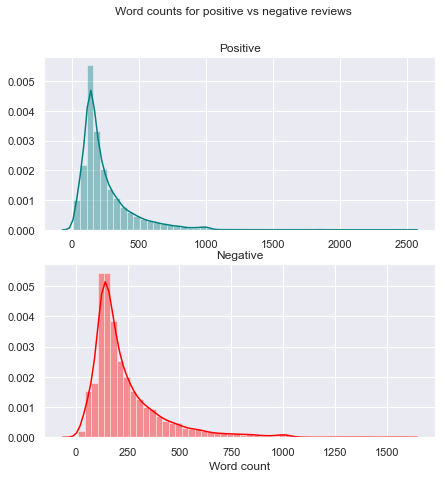

In [163]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,7))
plt.suptitle("Word counts for positive vs negative reviews")

sns.distplot(df['review_length'].loc[bool_mask], color="teal", ax=axes[0])
axes[0].set_title("Positive")
sns.distplot(df['review_length'].loc[~bool_mask], color="red", ax=axes[1])
axes[1].set_title("Negative")
axes[0].set(xlabel=None)
axes[1].set(xlabel="Word count")
plt.show();